In [1]:
from operator import concat

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import geopandas as gpd
import mapclassify
import libpysal

In [28]:
data = pd.read_excel('../datasets/Materiały do pobrania-20251025/wojewodztwa.xlsx', 'Dane', dtype={'Id':str})
data.head(16)

,Wojewodztwo,Id,X1_s,X2_s,X3_s,X4_d,X5_s,X6_d,X7_s
0,Dolnośląskie,02,42,68,6,2798,3,198,1704.05
1,Kujawsko-pomorskie,04,32,69,4,3309,2,217,1564.67
2,Lubelskie,06,41,78,6,2608,2,193,1473.19
3,Lubuskie,08,25,66,6,3241,2,237,1629.42
4,Łódzkie,10,47,69,7,2722,3,197,1556.57
5,Małopolskie,12,40,79,6,3044,3,229,1598.05
6,Mazowieckie,14,50,78,6,3109,2,210,1967.62
7,Opolskie,16,26,67,6,3092,3,223,1524.27
8,Podkarpackie,18,27,82,6,3099,2,214,1312.99
9,Podlaskie,20,46,74,6,2969,3,201,1550.65


In [29]:
zmienne = pd.read_excel('../datasets/Materiały do pobrania-20251025/wojewodztwa.xlsx', 'Zmienne')
zmienne.head(10)

,Zmienna,Etykieta
0,X1_s,Lekarze z prawem wykonywania zawodu medycznego...
1,X2_s,Pielęgniarki i położne na 10 tys. ludności
2,X3_s,Przychodnie na 10 tys. ludności
3,X4_d,Ludność na aptekę ogólnodostępną
4,X5_s,Liczba szpitali na 100 tys. ludności
5,X6_d,Liczba ludności na łóżko w szpitalach ogólnych
6,X7_s,Dochód do dyspozycji na osobę


In [9]:
xij = data.loc[:, 'X1_s':'X7_s'].to_numpy()
woj = data.loc[:,"Wojewodztwo"]
var = zmienne.loc[:,"Zmienna"]
n = xij.shape[0]
m = xij.shape[1]

In [13]:
zij = np.zeros((n,m))
for j in range(m):
    column= xij[:,j]
    zij[:,j] = column/np.sqrt(column @ column)
zij

array([[0.28145482, 0.2377448 , 0.25654147, 0.2316175 , 0.2941742 ,
        0.22891933, 0.26587856],
       [0.21444176, 0.24124105, 0.17102765, 0.27391791, 0.19611614,
        0.25088633, 0.24413146],
       [0.27475351, 0.27270727, 0.25654147, 0.21588937, 0.19611614,
        0.22313854, 0.22985807],
       [0.16753263, 0.2307523 , 0.25654147, 0.2682889 , 0.19611614,
        0.2740095 , 0.25423423],
       [0.31496134, 0.24124105, 0.29929839, 0.22532625, 0.2941742 ,
        0.22776317, 0.24286763],
       [0.26805221, 0.27620352, 0.25654147, 0.2519813 , 0.2941742 ,
        0.26476023, 0.24933965],
       [0.33506526, 0.27270727, 0.25654147, 0.25736198, 0.19611614,
        0.24279323, 0.30700271],
       [0.17423393, 0.23424855, 0.25654147, 0.25595472, 0.2941742 ,
        0.25782328, 0.23782795],
       [0.18093524, 0.28669226, 0.25654147, 0.25653418, 0.19611614,
        0.24741786, 0.20486247],
       [0.30826004, 0.25872228, 0.25654147, 0.24577283, 0.2941742 ,
        0.2323878 , 0.2

Uwzględnienie wag przypisanych poszczególnym cechom
$v_{ij}=w_{j}z_{ij}$

In [16]:
wj = np.repeat(1,m)
vij = np.zeros((n,m))
for i in range (n):
    vij[i:,] = wj*zij[i,:]
vij

array([[0.28145482, 0.2377448 , 0.25654147, 0.2316175 , 0.2941742 ,
        0.22891933, 0.26587856],
       [0.21444176, 0.24124105, 0.17102765, 0.27391791, 0.19611614,
        0.25088633, 0.24413146],
       [0.27475351, 0.27270727, 0.25654147, 0.21588937, 0.19611614,
        0.22313854, 0.22985807],
       [0.16753263, 0.2307523 , 0.25654147, 0.2682889 , 0.19611614,
        0.2740095 , 0.25423423],
       [0.31496134, 0.24124105, 0.29929839, 0.22532625, 0.2941742 ,
        0.22776317, 0.24286763],
       [0.26805221, 0.27620352, 0.25654147, 0.2519813 , 0.2941742 ,
        0.26476023, 0.24933965],
       [0.33506526, 0.27270727, 0.25654147, 0.25736198, 0.19611614,
        0.24279323, 0.30700271],
       [0.17423393, 0.23424855, 0.25654147, 0.25595472, 0.2941742 ,
        0.25782328, 0.23782795],
       [0.18093524, 0.28669226, 0.25654147, 0.25653418, 0.19611614,
        0.24741786, 0.20486247],
       [0.30826004, 0.25872228, 0.25654147, 0.24577283, 0.2941742 ,
        0.2323878 , 0.2

Ustalenie wektora wartości rozwiązania idealnego $a^{+}$ i antyidealnego $a^{-}$**
$a^{+}=\left(a_{1}^{+},\ldots,a_{k}^{+}\right)=\left\{\left(\max\limits_{i=1,\ldots,k}v_{ij}\left|j\in J_{Q}\right.\right),\left(\min\limits_{i=1,\ldots,k}v_{ij}\left|j\in J_{C}\right.\right)\right\}$


In [19]:
apl = np.r_[np.max(
    vij[:,0]),
np.max(vij[:,1]),
np.max(vij[:,2]),
np.min(vij[:,3]),
np.max(vij[:,4]),
np.min(vij[:,5]),
np.max(vij[:,6])]
apl

array([0.33506526, 0.2901885 , 0.29929839, 0.21588937, 0.2941742 ,
       0.21273311, 0.30700271])

In [21]:
ami = np.r_[np.min(
    vij[:,0]),
np.min(vij[:,1]),
np.min(vij[:,2]),
np.max(vij[:,3]),
np.min(vij[:,4]),
np.max(vij[:,5]),
np.min(vij[:,6])]
ami

array([0.16753263, 0.18530109, 0.17102765, 0.27391791, 0.19611614,
       0.2959765 , 0.20486247])

Obliczenie odległości euklidesowych badanych obiektów od rozwiązania idealnego i antyidealnego

$d_{i}^{+}=\sqrt{\sum_{j=1}^{k}\left(v_{ij}-a_{j}^{+}\right)^{2}}$

$d_{i}^{-}=\sqrt{\sum_{j=1}^{k}\left(v_{ij}-a_{j}^{-}\right)^{2}}$


In [60]:
dpl = np.zeros(n)
dmi = np.zeros(n)
for i in range(n):
    dpl[i] = np.sqrt(np.sum(np.square(vij[i,:]-apl)))
    dmi[i] = np.sqrt(np.sum(np.square(vij[i,:]-ami)))
dpl

InvalidIndexError: (0, slice(None, None, None))

Wyznaczenie współczynnika rankingowego określającego podobieństwo obiektów do rozwiązania idealnego
$R_{i}=\frac{d_{i}^{-}}{d_{i}^{+}+d_{i}^{-}}$

In [23]:
R = dmi/(dpl+dmi)
R

array([0.67766341, 0.2931155 , 0.56351711, 0.32678935, 0.74136546,
       0.625789  , 0.6648402 , 0.4294395 , 0.39359824, 0.69799092,
       0.3851962 , 0.6920512 , 0.39865523, 0.41047938, 0.3807896 ,
       0.57799586])

Zamiana macierzy na ramki danych

In [30]:
xij = pd.DataFrame(xij, columns=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7'])
zij = pd.DataFrame(zij, columns=['z1', 'z2', 'z3', 'z4', 'z5', 'z6', 'z7'])
vij = pd.DataFrame(vij, columns=['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7'])
dpl = pd.DataFrame(dpl, columns=['dpl'])
dmi = pd.DataFrame(dmi, columns=['dmi'])
R = pd.DataFrame(R, columns=['R'])
data_all = pd.concat([woj, data['Id'], xij, vij, dpl, dmi, R], axis=1)

In [32]:
data_all.sort_values(by='R', ascending=False, inplace=True)
data_all

,Wojewodztwo,Id,x1,x2,x3,x4,x5,x6,x7,v1,v2,v3,v4,v5,v6,v7,dpl,dmi,R
4,Łódzkie,10,47.0,69.0,7.0,2722.0,3.0,197.0,1556.57,0.314961,0.241241,0.299298,0.225326,0.294174,0.227763,0.242868,0.085019,0.243704,0.741365
9,Podlaskie,20,46.0,74.0,6.0,2969.0,3.0,201.0,1550.65,0.308260,0.258722,0.256541,0.245773,0.294174,0.232388,0.241944,0.095125,0.219849,0.697991
11,Śląskie,24,40.0,82.0,6.0,3053.0,3.0,184.0,1691.76,0.268052,0.286692,0.256541,0.252726,0.294174,0.212733,0.263961,0.097676,0.219507,0.692051
0,Dolnośląskie,02,42.0,68.0,6.0,2798.0,3.0,198.0,1704.05,0.281455,0.237745,0.256541,0.231618,0.294174,0.228919,0.265879,0.098250,0.206556,0.677663
6,Mazowieckie,14,50.0,78.0,6.0,3109.0,2.0,210.0,1967.62,0.335065,0.272707,0.256541,0.257362,0.196116,0.242793,0.307003,0.119886,0.237813,0.664840
5,Małopolskie,12,40.0,79.0,6.0,3044.0,3.0,229.0,1598.05,0.268052,0.276204,0.256541,0.251981,0.294174,0.264760,0.249340,0.117682,0.196798,0.625789
15,Zachodniopomorskie,32,38.0,64.0,6.0,2958.0,3.0,217.0,1674.78,0.254650,0.223760,0.256541,0.244862,0.294174,0.250886,0.261312,0.130730,0.179054,0.577996
2,Lubelskie,06,41.0,78.0,6.0,2608.0,2.0,193.0,1473.19,0.274754,0.272707,0.256541,0.215889,0.196116,0.223139,0.229858,0.146445,0.189067,0.563517
7,Opolskie,16,26.0,67.0,6.0,3092.0,3.0,223.0,1524.27,0.174234,0.234249,0.256541,0.255955,0.294174,0.257823,0.237828,0.198110,0.149110,0.429439
13,Warmińsko-mazurskie,28,27.0,61.0,6.0,3308.0,3.0,223.0,1513.28,0.180935,0.213271,0.256541,0.273835,0.294174,0.257823,0.236113,0.204736,0.142556,0.410479


Wykres miernika R

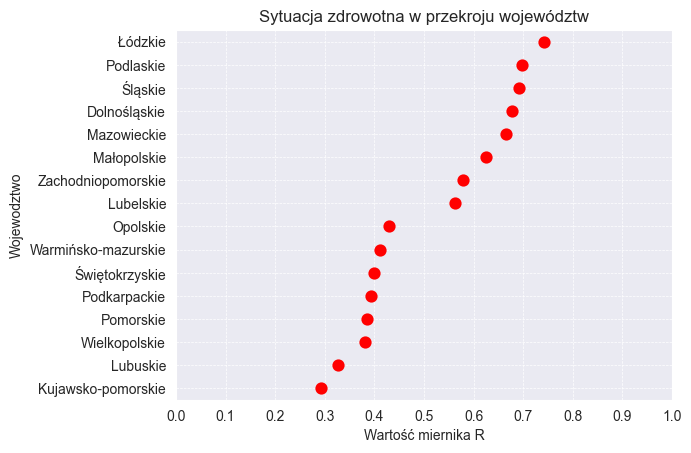

In [44]:
fig = sns.pointplot(data=data_all,
              y='Wojewodztwo',
              x='R',
              linestyle='none',
              color='red')
fig.set(xlabel='Wartość miernika R',
        ylabel='Wojewodztwo',
        title = 'Sytuacja zdrowotna w przekroju województw')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.grid(True, linestyle='--', linewidth='0.5')

### Kartogram dla R

In [45]:
wojewodztwa = gpd.read_file('../datasets/Materiały do pobrania-20251025/gadm41_POL_1.shp')

<Axes: >

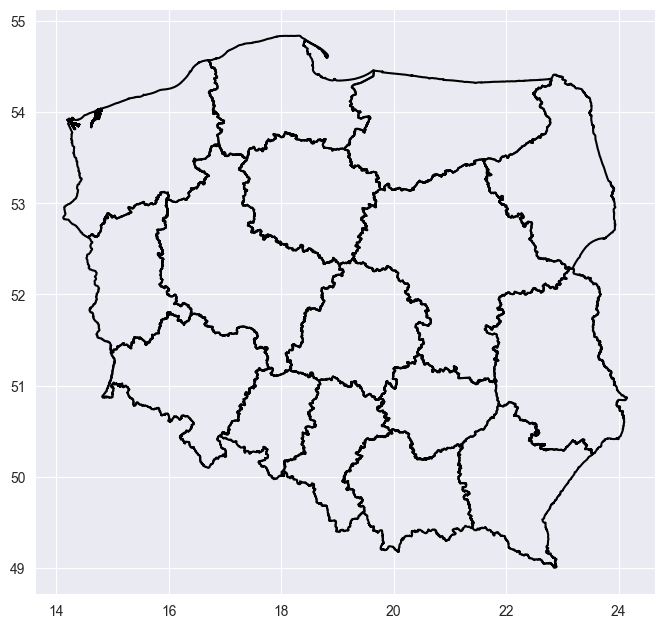

In [49]:
wojewodztwa.boundary.plot(edgecolor='k', figsize=(8,8))

### Łączenie danych po kluczu
Na potrzeby wizualizacji danych za pomocą gpd plik shp zawsze musi być "po lewej"

In [51]:
df = pd.merge(wojewodztwa, data_all, left_on='CC_1', right_on='Id')

In [52]:
df

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,...,v1,v2,v3,v4,v5,v6,v7,dpl,dmi,R
0,POL.1_1,POL,Poland,Dolnośląskie,NA,NA,Województwo,Voivodeship,02,NA,...,0.281455,0.237745,0.256541,0.231618,0.294174,0.228919,0.265879,0.098250,0.206556,0.677663
1,POL.2_1,POL,Poland,Kujawsko-Pomorskie,NA,NA,Województwo,Voivodeship,04,NA,...,0.214442,0.241241,0.171028,0.273918,0.196116,0.250886,0.244131,0.227575,0.094366,0.293116
2,POL.3_1,POL,Poland,Łódzkie,NA,NA,Województwo,Voivodeship,10,NA,...,0.314961,0.241241,0.299298,0.225326,0.294174,0.227763,0.242868,0.085019,0.243704,0.741365
3,POL.4_1,POL,Poland,Lubelskie,NA,NA,Województwo,Voivodeship,06,NA,...,0.274754,0.272707,0.256541,0.215889,0.196116,0.223139,0.229858,0.146445,0.189067,0.563517
4,POL.5_1,POL,Poland,Lubuskie,NA,NA,Województwo,Voivodeship,08,NA,...,0.167533,0.230752,0.256541,0.268289,0.196116,0.274009,0.254234,0.228754,0.111042,0.326789
5,POL.6_1,POL,Poland,Małopolskie,NA,NA,Województwo,Voivodeship,12,NA,...,0.268052,0.276204,0.256541,0.251981,0.294174,0.264760,0.249340,0.117682,0.196798,0.625789
6,POL.7_1,POL,Poland,Mazowieckie,NA,NA,Województwo,Voivodeship,14,NA,...,0.335065,0.272707,0.256541,0.257362,0.196116,0.242793,0.307003,0.119886,0.237813,0.664840
7,POL.8_1,POL,Poland,Opolskie,NA,NA,Województwo,Voivodeship,16,NA,...,0.174234,0.234249,0.256541,0.255955,0.294174,0.257823,0.237828,0.198110,0.149110,0.429439
8,POL.9_1,POL,Poland,Podkarpackie,NA,NA,Województwo,Voivodeship,18,NA,...,0.180935,0.286692,0.256541,0.256534,0.196116,0.247418,0.204862,0.220226,0.142942,0.393598
9,POL.10_1,POL,Poland,Podlaskie,NA,NA,Województwo,Voivodeship,20,NA,...,0.308260,0.258722,0.256541,0.245773,0.294174,0.232388,0.241944,0.095125,0.219849,0.697991


(np.float64(13.621739863950143),
 np.float64(24.64692735705007),
 np.float64(48.71032600430018),
 np.float64(55.128136825700075))

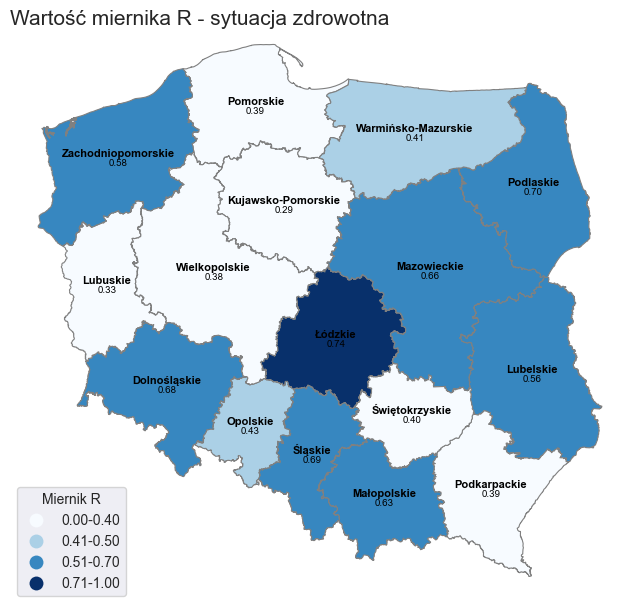

In [53]:
# Wizualizacja danych bez szczegółowych ustawień
ax = df.plot(column='R', cmap='Blues', figsize=(8,8),
             linewidth=0.8, edgecolor='grey', legend=True, k=4,
             scheme="userdefined",
             classification_kwds={'bins':[0.4,0.5,0.7,1]},
             legend_kwds={'labels':['0.00-0.40','0.41-0.50',
                                    '0.51-0.70','0.71-1.00'],
                          'loc':'lower left','fontsize':10,
                          'title':'Miernik R'})

ax.set_title('Wartość miernika R - sytuacja zdrowotna',
             fontdict={'fontsize':'15','fontweight':'3',
                       'horizontalalignment':'left',
                       'verticalalignment':'top'},
             loc='left')

# Dodanie nazw województw i wartości R
for idx, row in df.iterrows():
    centroid = row['geometry'].centroid

    # Nazwa województwa
    ax.annotate(text=row['NAME_1'],
                xy=(centroid.x, centroid.y),
                ha='center',
                va='bottom',  # wyrównanie do dołu
                fontsize=8,
                color='black',
                weight='bold')

    # Wartość miernika R (poniżej nazwy)
    ax.annotate(text=f"{row['R']:.2f}",
                xy=(centroid.x, centroid.y),
                ha='center',
                va='top',  # wyrównanie do góry
                fontsize=7,
                color='black')
ax.axis('off')



Dodać interpretacje do google maps

In [57]:
import folium

In [67]:
df['R'] = df['R'].round(2)

In [71]:
m = df.explore(
    column='R',
    cmap='Blues',
    scheme="userdefined",
    classification_kwds={
        'bins': [0.4, 0.5, 0.7, 1]
    },
    legend=True,
    legend_kwds={
        'caption': 'Miernik R'
    },
    tooltip=['Wojewodztwo', 'R'],
    popup=False,
    style_kwds={
        'weight': 0.8,
        'color': 'grey'
    },
    tiles='CartoDB positron'
)

In [69]:
title_html = """
             <h3 align="left" style="font-size:15px; font-weight:3;">
             <b>Wartość miernika R - sytuacja zdrowotna</b>
             </h3>
             """

m.get_root().html.add_child(folium.Element(title_html))

In [72]:
m.save('../output/wojewodztwa.html')